In [12]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import numpy.linalg as la
import scipy.stats as stats
%matplotlib inline

First, we create a function to generate the data for the three-coin problem.  This function takes the true input parameters in form  θ=(λ,p1,p1) and generates an array of the observed data.  Each entry of the array is the number of heads

In [ ]:
def gen_threecoin_data(theta, n):
    #Generates data on number of heads from observed coins
    #Returns: data -- an array of the number of heads from each flip of the first coin
    data = np.empty(n)
    lamda = theta[0]
    p = theta[1]
    q = theta[2]
    for i in xrange(n):
        first_coin = random.binomial(1, lamda)
        if first_coin:
            flips = np.sum(random.binomial(3, p))
        else:
            flips = np.sum(random.binomial(3, q))
        data[i] = flips    
    return data

This algorithm will calculate the solution to the three-coin problem

In [47]:
def three_coin(data, guess, n):
    #theta_hat will be updated at each iteration of our algorithm
    theta_hat = guess
    n = float(n)
    iters=0
    maxiters=50000
    while True:
        theta_old = theta_hat
        lamda = theta_hat[0]
        p = theta_hat[1]
        q = theta_hat[2]

        mu = (lamda*p**data*(1.-p)**(3.-data))/(lamda*p**data*(1.-p)**(3.-data) + (1-lamda)*q**data*(1.-q)**(3.-data))
        lamda_hat = np.sum(mu)/n
        q_hat = np.sum(data*(1-mu))/(3*np.sum((1-mu)))
        p_hat = np.sum(data*mu)/(3*np.sum(mu))
        theta_hat = np.array([lamda_hat, p_hat, q_hat])
        if np.allclose(theta_old,theta_hat):
            break
        if iters > maxiters:
            print "Max iterations reached"
            break
        iters += 1
    return theta_hat

This function generates random draws from the normal distrbution

In [ ]:
def gen_GM_data(lamdas, means, variances, n):
    #means, variances, and lamdas should all have same length
    #Since lamdas are params to a multinomial, all should sum to 1
    #N represents the length of the data array
    data = np.empty(n)
    st_devs = np.sqrt(variances)
    mix = random.multinomial(n, lamdas)
    index = 0
    for l in xrange(len(mix)):
        k = mix[l]
        for i in xrange(k):
            draw = random.normal(loc=means[l], scale=st_devs[l])
            data[index] = draw
            index += 1
    random.shuffle(data)
    return data

This gives us the height of the gaussian pdf for each draw in our dataset.  It is used for calculating the weights in the Gaussian Mixture Algorithm

In [ ]:
def gaussian(x, mean, var):
    #x = array of length n; values of x of which to return draws of normal distribution
    n = x.size
    x = x.reshape((n,1))
    ones = np.ones((n, len(mean)))
    return (ones/np.sqrt(2*np.pi*var))*np.exp(-1*(x-mean)**2/(2*var))

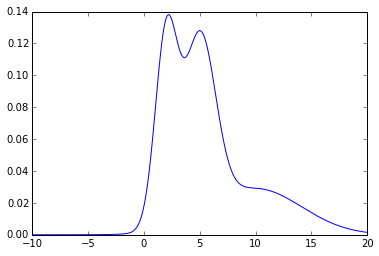

In [13]:
X = np.linspace(-10, 20, 1000)
lamdas_GM = np.array([.3, .4, .3])
means_GM = np.array([2, 5, 10])
variances_GM = np.array([1, 2, 17])
Y = gaussian(X, means_GM, variances_GM)
Y = Y*lamdas_GM
Y = Y.sum(axis=1)
plt.plot(X, Y)
plt.show()

For some reason, one of my variances keeps going to zero and I can't figure out why.  If you can offer feedback on what's going wrong, I would really appreciate it.

In [1]:
def gaussian_mix(lamda_guess, mean_guess, var_guess, data):
    n = data.size
    iters = 0
    maxiters = 10000
    
    while True:
        w = lamda_guess*gaussian(data, mean_guess, var_guess)
        z = np.sum(w, axis=1).reshape((n,1))
        w = w/z
        w_sum = np.sum(w, axis=0)

        
        lamdas = w_sum/n
        means = data.dot(w)/w_sum
        variances = np.diag(np.square(data.reshape((n,1))-mean_guess).T.dot(w)/w_sum)
        
        if np.allclose(lamdas, lamda_guess) and np.allclose(means, mean_guess) and np.allclose(variances, var_guess):
            break
        if iters > maxiters:
            break

        #print "Lamdas: ", lamdas
        #print "Means: ", means
        #print "Variances: ", variances
        lamda_guess = lamdas
        mean_guess = means
        var_guess = variances
        iters += 1
        
    return lamdas, means, variances

NameError: name 'np' is not defined

Define true parameters in format $\theta = (\lambda, p_1, p_1)$

$N$ = Number of draws 

guess = $\hat{\theta}$, a guess at initial parameters

In [ ]:
theta = np.array([.2, .1, .7])
N = 10000
coinguess = np.array([.8, .8, .6])

Run the algorithm and print the output and the actual parameters

In [64]:
coindata = gen_threecoin_data(theta, N)
theta_three_coin = three_coin(coindata, coinguess, N)

print "Actual theta: ", theta
print "Estimated theta: ", theta_three_coin

Actual theta:  [ 0.2  0.1  0.7]
Estimated theta:  [ 0.78460482  0.70800844  0.11665304]


Similarly, generate data for the Gaussian Mixture Model

In [ ]:
lamdas_GM = np.array([.3, .4, .3])
means_GM = np.array([2, 5, 10])
variances_GM = np.array([1, 2, 17])

data_GM = gen_GM_data(lamdas_GM, means_GM, variances_GM, 1000)


lamda_guess = np.array([.2, .3, .5])
mean_guess = np.array([2, 4, 7])
var_guess = np.array([1.5, 2, 14])

Now make a guess run the algorithm.  For some reason, mine keeps failing to converge...

In [ ]:
est_lamdas, est_means, est_vars = gaussian_mix(lamda_guess, mean_guess, var_guess, data)

print "Actual lamdas: ", lamdas_GM
print "Estimated lamdas: ", est_lamdas, "\n"
print "Actual means: ", means_GM
print "Estimated means: ", est_means, "\n"
print "Actual variances: ", variances_GM
print "Estimated variances: ", est_vars

[ 2.  1.  0. ...,  2.  0.  0.]
[[ 0.5515789   0.26359371  0.18482739]
 [ 0.66365452  0.12681371  0.20953177]
 [ 0.61359875  0.05538444  0.33101681]
 ..., 
 [ 0.5515789   0.26359371  0.18482739]
 [ 0.61359875  0.05538444  0.33101681]
 [ 0.61359875  0.05538444  0.33101681]]
Lamdas:  [ 0.56972419  0.2002843   0.22999151]
Means:  [ 1.20759359  2.00806487  1.18230824]
Variances:  [  1.44934774   4.77769619  34.91763459]
[ 2.  1.  0. ...,  2.  0.  0.]
[[ 0.74536828  0.17922681  0.07540491]
 [ 0.79356598  0.1402209   0.06621312]
 [ 0.74443463  0.15631539  0.09924998]
 ..., 
 [ 0.74536828  0.17922681  0.07540491]
 [ 0.74443463  0.15631539  0.09924998]
 [ 0.74443463  0.15631539  0.09924998]]
Lamdas:  [ 0.73450583  0.17895423  0.08653995]
Means:  [ 1.29428423  1.59359832  1.45897407]
Variances:  [ 0.90266576  1.30916856  1.30799564]
[ 2.  1.  0. ...,  2.  0.  0.]
[[ 0.7322802   0.18327496  0.08444485]
 [ 0.78108732  0.14491085  0.07400183]
 [ 0.76704502  0.14879521  0.08415977]
 ..., 
 [ 0.73228